<img src="https://insights.blackcoffer.com/wp-content/uploads/2018/12/Insights-blackv02.png" width="240" height="360" />









## Data Extraction and NLP - Test Assignment

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Import the required libraries](#section2)<br>
3. [Load the data and initialize variables](#section3)<br>
4. [Define a function to count syllables in a word](#section4)<br>
5. [Loop through the list of URLs:](#section5)<br>
    - [Retrieve the webpage content](#section5.1)<br>
    - [Extract the main content from the webpage](#section5.2)<br>
    - [Tokenize the text and perform analysis:](#section5.3)<br>
        - [Save the extracted article to a text file](#section5.3.1)<br>
        - [Filter the tokens by removing stop words and punctuation](#section5.3.2)<br>
        - [Calculate the positive and negative word counts](#section5.3.3)<br>
        - [Calculate the polarity and subjectivity scores](#section5.3.4)<br>
        - [Perform readability analysis:](#section5.3.5)<br>
            -[ Count the number of words and sentences](#section5.3.5.1)<br>
            - [Calculate the average words per sentence](#section5.3.5.2)<br>
            - [Count syllables and complex words](#section5.3.5.2)<br>
            - [Calculate the percentage of complex words and fog index](#section5.3.5.2)<br>
        - [Count personal pronouns](#section5.3.5.2)<br>
        - [Calculate average word length](#section5.3.5.2)<br>
    - [Write the analyzed data to a CSV file](#section5.3.5.2)<br>
6. [Display the results](#section6)<br>


### 1. Problem Statement <a id='section1'></a>

The goal of this test assignment is to perform data extraction and Natural Language Processing (NLP) analysis on a given URLs. The extracted data will be used to calculate various metrics related to sentiment analysis, Analysis of Readability, and linguistic features.

The steps involved in the assignment are as follows:

1. Data Extraction: The script will retrieve the content of each URL in the provided list. The main content of the webpage will be extracted using BeautifulSoup and stored in text files for further analysis.

2. NLP Analysis: The extracted text will undergo NLP analysis to extract meaningful insights. The analysis will include the following:

   - Sentiment Analysis: Positive and negative words will be counted to calculate the positive and negative scores. The polarity score and subjectivity score will be calculated based on the counts.
   
   - Readability Analysis: The text will be analyzed for readability using metrics such as average sentence length, percentage of complex words, FOG index, average number of words per sentence, and syllable count per word.
   
   - Linguistic Features: The presence of personal pronouns (I, we, my, ours) will be counted to determine the frequency of their usage in the text. The average word length will also be calculated.
   
3. Data Storage: The calculated metrics will be stored in a CSV file named "BlackCoffer.csv". 
The assignment aims to provide valuable insights into the sentiment, readability, and linguistic features of the extracted text from the given URLs.

### 2. Importing Libraries <a id='section2'></a>

To perform the text analysis, we need to import the necessary libraries. These libraries provide various functions and tools for text preprocessing, sentiment analysis, readability analysis, and more. The following libraries are used in this analysis:

- **string**: This library provides a set of string constants and helper functions for string operations. We use it to handle punctuation removal.
- **requests**: This library allows us to send HTTP requests and retrieve the content of web pages. We use it to fetch the text data from URLs.
- **re**: The **re** module provides support for regular expressions, which are useful for pattern matching and text manipulation. We use it to extract specific words from the text.
- **BeautifulSoup**: This library is used for web scraping and parsing HTML or XML documents. We use it to extract the article text content from web pages.
- **nltk**: The Natural Language Toolkit (NLTK) is a popular library for natural language processing tasks. It provides various tools and resources for text analysis, including tokenization, stop word removal, and more. We download the required resources using the **nltk.download** function.


In [39]:
import string
import requests
import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\N Sanjay
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\N Sanjay
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 3. Load Data and Initialize Variables <a id='section3'></a>

To perform sentiment analysis, we need to load two word lists: positive words and negative words. Additionally, we also initialize variables for storing analysis results.

The following steps outline the process:

- Initialize two sets: **positive_words** and **negative_words**.
- Read the positive word list from the file **positive-words.txt** and store the words in the **positive_words** set.
- Read the negative word list from the file **negative-words.txt** and store the words in the **negative_words** set.
- Define a list of stop words files that contain common words to be excluded from the analysis.
- Initialize an empty set called **stop_words**.
- Iterate over each stop words file in the **stop_words_files** list and read the words from each file into the **stop_words** set using the **update()** function.
- Import the **csv** module to handle CSV file operations.
- Define the header row for the output CSV file, which includes the column names for various analysis metrics.
- Open the output CSV file named **BlackCoffer.csv** in write mode, and use the **csv.writer()** function to create a writer object.
- Write the header row to the CSV file using the **writerow()** function.
- Import the **pandas** library to read the input data from an Excel file.
- Read the input data from the Excel file **input.xlsx** into a pandas DataFrame called **df**.
- Extract the URLs column from the DataFrame and convert it into a Python list called **urls** for further processing.


In [40]:
positive_words =set()

negative_words =set()


with open('positive-words.txt','r') as f:
    positive_words = set(f.read().splitlines())
    
with open('negative-words.txt','r') as f:
    negative_words = set(f.read().splitlines())
    
    
stop_words_files = [
    'StopWords_Auditor.txt',
    'StopWords_Currencies.txt',
    'StopWords_DatesandNumbers.txt',
    'StopWords_Generic.txt',
    'StopWords_GenericLong.txt',
    'StopWords_Geographic.txt',
    'StopWords_Names.txt'
]

stop_words = set()

for file in stop_words_files:
    with open(file,'r') as f:
        stop_words.update(f.read().splitlines())

import csv

header = ['URL_ID', 'URL', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE', 'SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT', 'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH']

with open("BlackCoffer.csv",'w',newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)


import pandas as pd

df = pd.read_excel('input.xlsx')

urls = df['URL'].tolist()        

## 4. Define a function to count syllables in a word <a id ='section4'></a>

- we define a function called count_syllables that takes a word as input and returns the number of syllables present in that word.

- To begin counting syllables, we need to understand the concept of vowels. In the English language, vowels are the sounds we make when we pronounce certain letters like 'a', 'e', 'i', 'o', 'u', and sometimes 'y'. We store these vowels in a variable called vowels.

- Now, let's break down the steps involved in counting syllables:

- We start by preparing the word for analysis. We convert it to lowercase using the lower() method and remove any punctuation marks from the beginning or end of the word using the strip() method. This ensures consistency and accuracy in our syllable counting process.

- We check if the word is empty. If it is, meaning it has no characters, we return 0 as there are no syllables to count.

- If the word starts with a vowel, we add a hyphen ('-') at the beginning. This helps us handle cases where words begin with a vowel sound, such as 'apple' or 'elephant', ensuring that we count the syllables correctly.

- Now, we initialize a variable called count to keep track of the syllable count.

- We loop through each character of the word, starting from the second character. We compare the current character and the previous character to determine syllable boundaries. If neither the current character nor the previous character is a vowel, we increment the count by 1 because it indicates the start of a new syllable.

- We check if the word ends with the letter 'e'. In many cases, the 'e' at the end of a word is silent and doesn't contribute to the syllable count. If we find an 'e' at the end, we decrement the count by 1.

- There's a special case when the word ends with 'le' preceded by a consonant. For example, in the word 'table', the 'le' is pronounced as a separate syllable. So, we check if the word ends with 'le' and the character before 'le' is a consonant. If these conditions are met, we increment the count by 1.

- Some word endings, like 'es' or 'ed', are often pronounced without adding an extra syllable. We check if the word ends with 'es' or 'ed' and, if so, we decrement the count by 1.

- If, after following the above rules, we find that no syllables have been counted (the count is still 0), we assume that there is at least one syllable in the word.

- Finally, we return the count, which represents the estimated syllable count of the word.


In [41]:
import string

def count_syllables(word):
    vowels = 'aeiouy'
    
    word = word.lower().strip(string.punctuation)
    
    if len(word) == 0:
        return 0
    
    if word[0] in vowels:
        word = '-' + word
        
    count = 0
    for index in range(1, len(word)):
        if word[index] and word[index-1] not in vowels:
            count += 1
            
    if word.endswith('e'):
        count -= 1
        
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        count += 1
        
    if word.endswith(('es', 'ed')):
        count -= 1
        
    if count == 0:
        count = 1
        
    return count

## 5. Loop through the list of URLs: <a id='section5'></a>

### Retrieve the webpage content:<a id =setion5.1></a>
This step involves sending a request to the specified URL using the <requests.get() method. The response object contains the content of the webpage:
- We start by setting an initial value for the url_id variable, which represents an identification number for each URL. As given format in the 'Output Data Structure.xlsx' file the url_id is set to 37.

- We use a for loop to iterate through each URL in the urls list.

- For each URL, we use the requests.get() function to send an HTTP GET request and retrieve the webpage's content.


### Extract the main content from the webpage: <a id =section5.2></a>

- We check if the response status code is 200, which indicates a successful request.

- If the response is successful, we create a BeautifulSoup object from the response content using the 'html.parser' parser.

- We search for the main content of the webpage by finding a specific HTML element with the class name 'td-post-content'.If this element is not found, the code attempts to find the main content using a different class name or method.

- If the main content is found, we extract the paragraphs (p-tag) within it and concatenate them into a single text variable

### Tokenize the text and perform analysis: <a id =section5.3></a>

- we tokenize the text into individual words using the word_tokenize() function. Tokenization is the process of breaking text into smaller units, such as words or sentences, for further analysis.

### Save the extracted article to a text file: <a id =section5.3.1></a>
- We save the extracted article text to a text file, using the url_id as the file name. This helps us keep track of the content associated with each URL.

### Filter the tokens by removing stop words and punctuation: <a id =section5.3.2></a>

- After saving the text, we apply some filtering to the tokens. We remove any stop words (from stop_word set) and punctuation marks to focus on the meaningful words for analysis.

### Calculate the positive and negative word counts: <a id =section5.3.3></a>
- We then count the number of positive and negative words in the filtered tokens by iterating through them and comparing against predefined lists of positive and negative words.

### Calculate the polarity and subjectivity scores: <a id =section5.3.4></a>
- Using the counts of positive and negative words, we calculate the polarity score, which represents the balance between positive and negative sentiment in the text, and the subjectivity score, which measures the overall subjectivity of the text.

### Perform readability analysis:<a id =section5.3.5></a>
- The code then performs readability analysis. It calculates the number of words, sentences, and average words per sentence. It also counts the number of syllables and complex words (words with more than two syllables).

- With the obtained data, we calculate additional readability metrics such as the percentage of complex words and the fog index, which is a measure of text complexity.

### Count personal pronouns: <a id =section5.3.5.1></a>
The regular expression pattern \b(?:I|we|my|ours)\b(?![a-z]) is used to count the occurrences of personal pronouns (e.g., I, we, my, ours) in the text.


<a id =section5.3.5.2></a>
- We calculate the average word length by summing the lengths of all filtered tokens and dividing by the total number of words. We also calculate the average sentence length by dividing the total word length by the number of sentences.

- Finally, we gather all the calculated data into a list called data and append it to a CSV file named "BlackCoffer.csv" using the csv.writer() function. This allows us to store the results for further analysis.

- Lastly, we increment the url_id by 1 to ensure unique identification for each URL.

- The code repeats this process for each URL in the urls list, extracting content, performing analysis, and saving the results to the CSV file.

In [42]:
url_id = 37
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        main_content = soup.find('div', class_='td-post-content')
        if not main_content:
                # Try finding main content using a different class name or method
                main_content = soup.find('div', class_='td-post-content tagdiv-type')
                # Add more conditions or methods as needed

        if main_content:
            paragraphs = main_content.find_all('p')

            text = ''
            for paragraph in paragraphs:
                text += paragraph.get_text() + '\n'

            tokens = word_tokenize(text)
   


            # Save extracted article to a text file with URL_ID as the file name
            file_name = f"{url_id}.txt"
            with open(file_name, 'w', encoding='UTF8') as f:
                f.write(text)



            filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.lower() not in string.punctuation]
            
            positive_count = sum(1 for token in filtered_tokens if token.lower() in positive_words)
            
            negative_count = sum(1 for token in filtered_tokens if token.lower() in negative_words)
            
            polarity_score = (positive_count - negative_count)/(positive_count + negative_count + 0.000001) 
            
            subjectivity_score = (positive_count + negative_count)/(len(filtered_tokens) + 0.000001)
    
            # Analysis of the readibility
            sentences = sent_tokenize(text)
            
            word_count = len(filtered_tokens)
            
            sentence_count = len(sentences)
            
            avg_word_per_sentence = word_count/sentence_count
    
            syllable_count = 0
            for token in filtered_tokens:
                syllable_count += count_syllables(token)
    
    
            complex_word_count = 0
            for token in filtered_tokens:
                if count_syllables(token) > 2:
                    complex_word_count += 1
    
            percentage_complex_words = complex_word_count / word_count
            
            fog_index = (avg_word_per_sentence + percentage_complex_words)
    
            # personal pronouns
            pronoun_count = len(re.findall(r"\b(?:I|we|my|ours)\b(?![a-z])", text, flags=re.IGNORECASE))
            
            # Average word length
            total_word_length = sum(len(token) for token in filtered_tokens)
            
            average_word_length = total_word_length /word_count
            
            average_sentence_length = total_word_length / sentence_count
    
            data = [url_id, url, positive_count, negative_count, polarity_score, subjectivity_score, average_sentence_length, percentage_complex_words, fog_index, avg_word_per_sentence, complex_word_count, word_count, syllable_count, pronoun_count, average_word_length]
            with open("BlackCoffer.csv",'a+',newline='', encoding='UTF8') as f:
                writer = csv.writer(f)
                writer.writerow(data)
            url_id +=1  

### Display the results: <a id =section6></a>
The read_csv() function reads the BlackCoffer.csv file and creates a DataFrame object named df. The head() function is used to display the first five rows of the DataFrame.

In [43]:
df = pd.read_csv('BlackCoffer.csv')

df.head()

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,37,https://insights.blackcoffer.com/ai-in-healthc...,66,34,0.320000,0.096993,101.573333,0.745878,14.492544,13.746667,769,1031,3831,0,7.388943
1,38,https://insights.blackcoffer.com/what-if-the-c...,60,38,0.224490,0.155556,52.898734,0.623810,8.598493,7.974684,393,630,2044,4,6.633333
2,39,https://insights.blackcoffer.com/what-jobs-wil...,65,38,0.262136,0.117984,77.261905,0.742268,11.135125,10.392857,648,873,3236,1,7.434135
3,40,https://insights.blackcoffer.com/will-machine-...,63,27,0.400000,0.128571,51.120879,0.644286,8.336593,7.692308,451,700,2322,15,6.645714
4,41,https://insights.blackcoffer.com/will-ai-repla...,58,23,0.432099,0.096774,75.671053,0.694146,11.707304,11.013158,581,837,2927,10,6.870968


<img src="https://th.bing.com/th/id/OIP.RGyC_tepr9oKfo5CknPWVgAAAA?w=255&h=159&c=7&r=0&o=5&pid=1.7" width="240" height="360" />








### Distribution of Positive Score: 

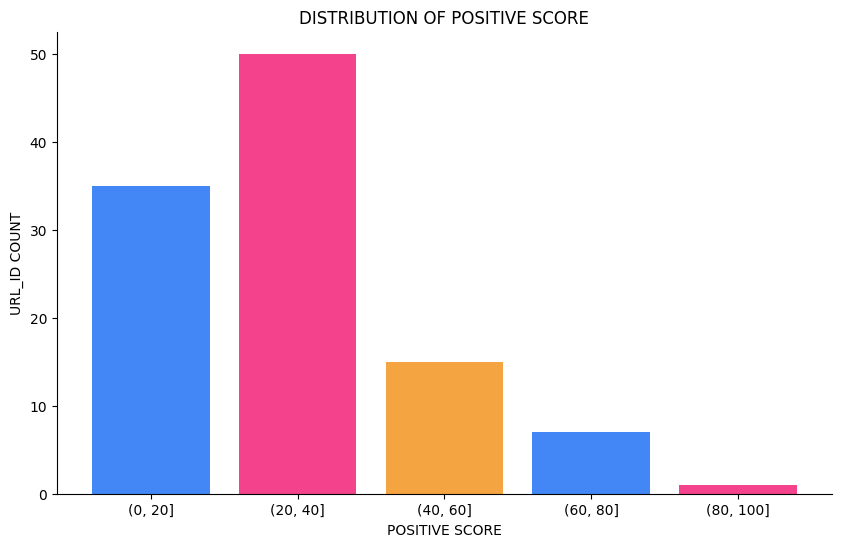

In [44]:
import matplotlib.pyplot as plt

bin_size = 20

bins = range(0, int(df['POSITIVE SCORE'].max()) + bin_size, bin_size)

positive_scores_binned = pd.cut(df['POSITIVE SCORE'], bins)

bin_counts = positive_scores_binned.value_counts().sort_index()

fig,ax = plt.subplots(figsize=(10,6))

ax.bar(bin_counts.index.astype(str), bin_counts.values, color=['#4287f5', '#f5428d', '#f5a442'])

ax.set_xlabel('POSITIVE SCORE')

ax.set_ylabel('URL_ID COUNT')

ax.set_title('DISTRIBUTION OF POSITIVE SCORE')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

### Distribution of Negative Score: 

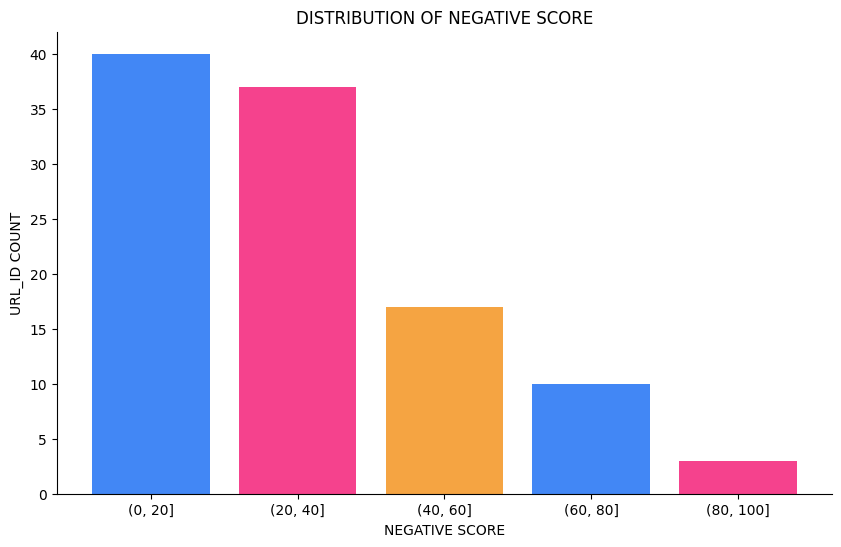

In [45]:
bin_size =20

bins = range(0,int(df['NEGATIVE SCORE'].max()) + bin_size,bin_size)

negative_scores_binned = pd.cut(df['NEGATIVE SCORE'], bins) 

bin_counts = negative_scores_binned.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(bin_counts.index.astype(str), bin_counts.values, color =['#4287f5', '#f5428d', '#f5a442'])

ax.set_xlabel('NEGATIVE SCORE')

ax.set_ylabel('URL_ID COUNT')

ax.set_title('DISTRIBUTION OF NEGATIVE SCORE')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()